### Sale Forcasting

Problem Statement:

For a retail furniture store, predicting future sales is critical to avoiding inventory issues like overstocking
or under-stocking. The challenge lies in utilizing time series data from the superstore dataset to forecast
furniture sales for the next year accurately. This predictive insight ensures an optimal customer
experience, avoids losses, and maintains store sustainability.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\Prerak\\Desktop\\Sale Forcasting\\Super_Store_data.csv",encoding='latin-1')


In [3]:
pd.set_option('display.max_columns', None)
df
# To see all columns data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.shape
#2121 rows and 21 columns we have

(2121, 21)

In [6]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [7]:
#First, we need to convert the orderdate and shipdate columns To datetime function
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Ship Date'] = df['Ship Date'].astype('datetime64[ns]')

In [8]:
df.dtypes
#successfully convert to datetime format

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [9]:
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].unique()
        print(f"Unique values in {col}: {unique_values}")


Unique values in Order ID: ['CA-2016-152156' 'US-2015-108966' 'CA-2014-115812' ... 'US-2015-151435'
 'CA-2014-110422' 'CA-2017-121258']
Unique values in Ship Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Unique values in Customer ID: ['CG-12520' 'SO-20335' 'BH-11710' 'SF-20065' 'EB-13870' 'TB-21520'
 'GH-14485' 'SN-20710' 'DP-13000' 'TB-21055' 'KM-16720' 'PS-18970'
 'JE-15745' 'KB-16600' 'PO-18865' 'KB-16315' 'PN-18775' 'LC-16870'
 'CV-12805' 'DK-13090' 'SC-20725' 'AD-10180' 'PF-19165' 'LS-16975'
 'LC-16885' 'JD-15895' 'MG-17680' 'JE-16165' 'DB-13060' 'BM-11140'
 'CS-12130' 'MP-17470' 'BS-11755' 'HK-14890' 'VW-21775' 'JB-15925'
 'DS-13180' 'VD-21670' 'CS-12400' 'KL-16645' 'DW-13480' 'LH-17155'
 'DR-12880' 'HA-14920' 'JO-15280' 'NZ-18565' 'KL-16555' 'JH-15910'
 'AS-10225' 'BP-11185' 'TS-21205' 'NM-18445' 'DJ-13510' 'PO-18850'
 'AC-10420' 'JL-15505' 'KW-16435' 'MK-17905' 'AR-10405' 'DO-13435'
 'DK-13225' 'AG-10675' 'KH-16510' 'KC-16675' 'PB-19150' 'MP-17965'
 'NF-18385

We can observe the data type of the unique values present in the column.

In [10]:
df['Region']= df['Region'].replace('Central','Center')

In [11]:
df['Region'].unique()

array(['South', 'West', 'East', 'Center'], dtype=object)

I made a change in the region column by replacing 'central' with 'center

In [12]:
#See NULL values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

we dont find any null values

In [13]:
#Duplicate values
df.duplicated().sum()

0

 don't find any duplicate value in data set

In [14]:
df.drop(['Order ID','Customer ID','Product ID'],axis=1,inplace=True)

In [15]:
df.head()

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


I drop the columns called OrderID and CustomerID because these two columns are not used for further processing.

In [16]:
d1 = df[['Order Date','Sales']]

In [17]:
d1['Order Date'] = pd.to_datetime(d1['Order Date'])

C:\Users\Prerak\AppData\Local\Temp\ipykernel_15668\386791081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Order Date'] = pd.to_datetime(d1['Order Date'])


In [18]:
d1

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2015-10-11,957.5775
3,2014-06-09,48.8600
4,2014-06-09,1706.1840
...,...,...
2116,2015-03-19,383.4656
2117,2016-12-05,13.4000
2118,2015-09-06,85.9800
2119,2014-01-21,25.2480


In [19]:
d1 = d1.groupby('Order Date').sum()

In [20]:
d1 =d1.groupby(pd.Grouper(freq='M')).sum()


In [21]:
d1

,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7944.8370
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


<Axes: xlabel='Order Date'>

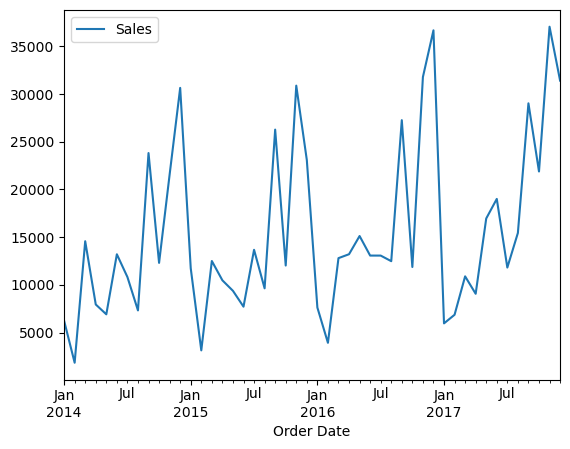

In [22]:
d1.plot()

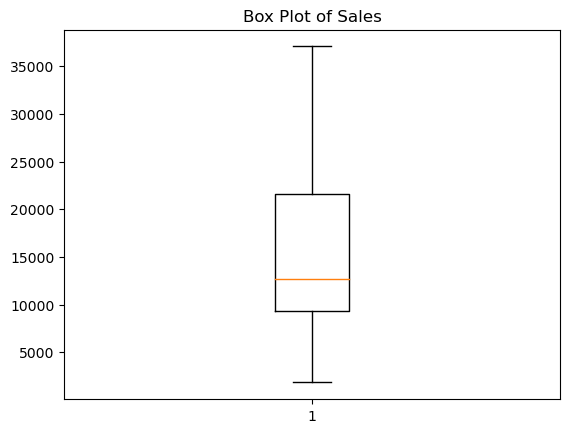

In [49]:
import matplotlib.pyplot as plt
plt.boxplot(d1['Sales'])
plt.title('Box Plot of Sales')
plt.show()

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

First Check data is seasonal or not

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
decompose = seasonal_decompose(d1['Sales'], model='additive', period=12)

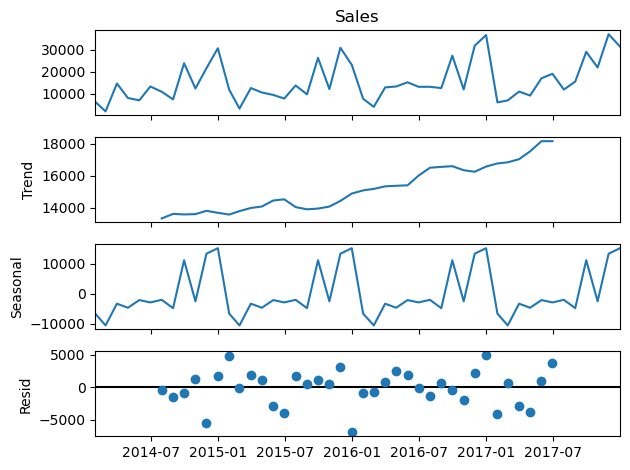

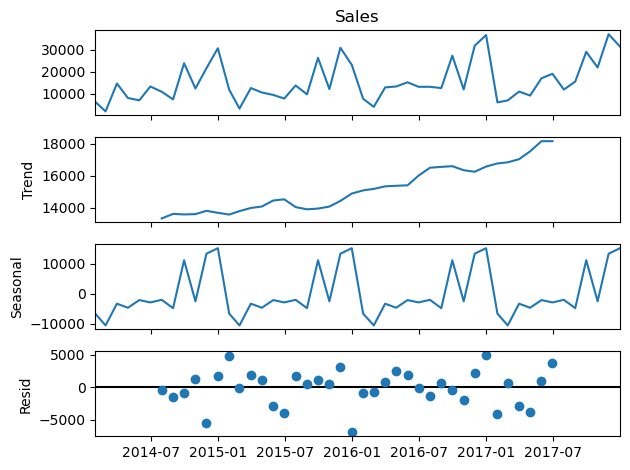

In [27]:
decompose.plot()



Axes(0.125,0.11;0.775x0.77)


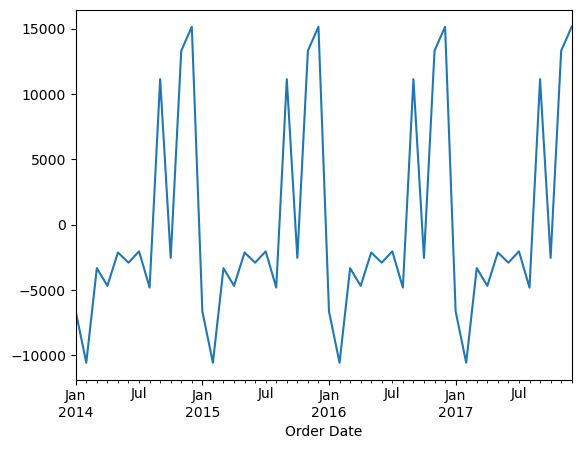

In [28]:
s = decompose.seasonal
print(s.plot())

As we show data is seasonal.

Now chack data is stationary or not

In [29]:
from statsmodels.tsa.stattools import adfuller

H0 = data is not-stationarity.
H1 = data is Stationary

In [53]:
adf = adfuller(d1['Sales'])
print('p-value:', adf[1])

if(adf[1]>0.05):
    print("The data is not stationary")
else:
    print("data is stationary")

p-value: 8.450793985809671e-05
data is stationary


here we reject the null hypothesis

In [54]:
mean = d1.rolling(window=12).mean()
std = d1.rolling(window=12).std()

<function matplotlib.pyplot.show(close=None, block=None)>

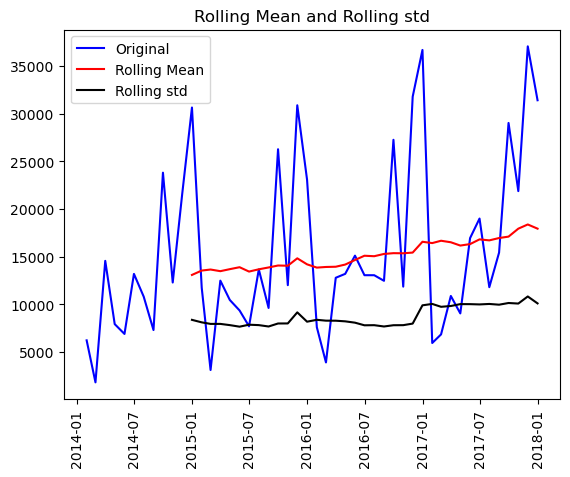

In [55]:
plt.plot(d1, color="blue",label="Original")
plt.plot(mean,color="red",label="Rolling Mean")
plt.plot(std,color="black",label="Rolling std")
plt.legend(loc="best")
plt.xticks(rotation = 90)
plt.title("Rolling Mean and Rolling std")
plt.show

No need to convert to stationary format beasuse our data is already stationary

In [56]:
from statsmodels.tsa.arima_model import ARIMA

First find p,d,q value.
two option to find pdq value 
first is manually 
second is automatig help with lib

In [57]:
#first we see first option 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

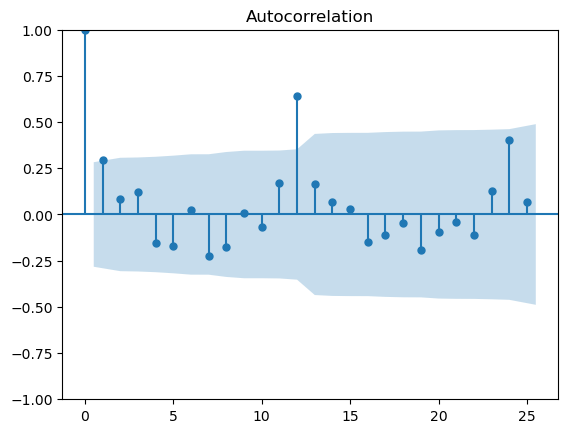

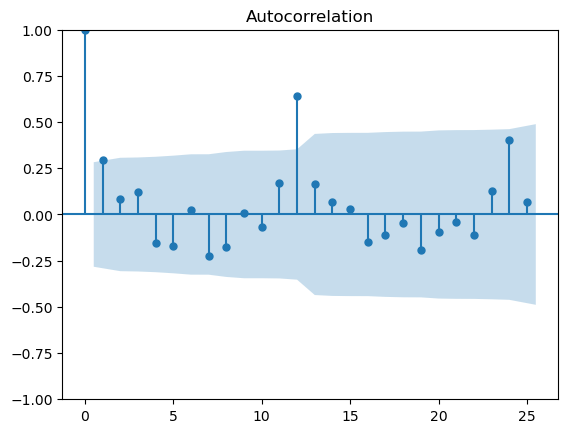

In [58]:
plot_acf(d1.dropna(),lags=25)

here q value we decied 2

In [59]:
from statsmodels.graphics.tsaplots import plot_acf

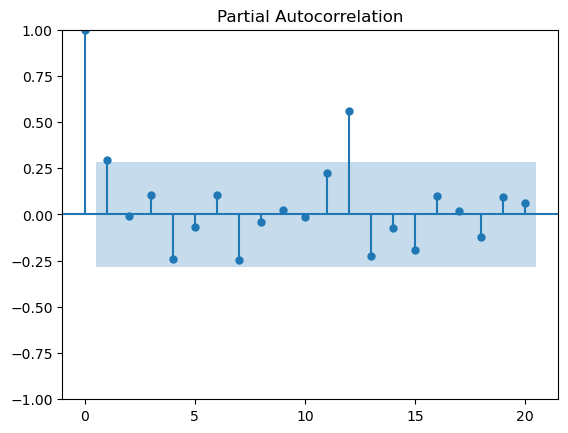

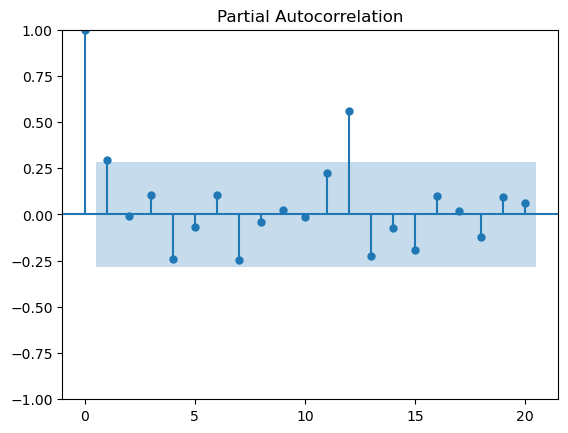

In [60]:
plot_pacf(d1.dropna(),lags=20)

here p value is 1

##### lets see our second option 
we use auto arima to see best pdq value

In [61]:
!pip install pmdarima

In [62]:
from pmdarima import auto_arima

In [63]:
auto_arima(d1,d=None, trace=True,error_action='ignore',m = 12,
                    suppress_warnings=True, 
                    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=715.201, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=708.796, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=709.325, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=709.756, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=711.529, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=707.976, Time=0.03 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=707.744, Time=0.08 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=709.738, Time=0.19 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=709.855, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=709.579, Time=0.14 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=709.985, Time=0.12 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=711.977, Time=0.25 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=708.710, Time=0.09 sec

Best model:  ARIMA(0,0,0)(2,1,0)[12] intercept
Total fit time: 1.684 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True)

In [64]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

In [65]:
train = d1[:round(len(d1)*70/100)]
test = d1[round(len(d1)*70/100):]

In [66]:
arima_model = ARIMA(train['Sales'],order = (2,1,0))
fit = arima_model.fit()

In [67]:
d1['Prediction'] = fit.predict(start=len(train), end=len(train)+len(test)-1)

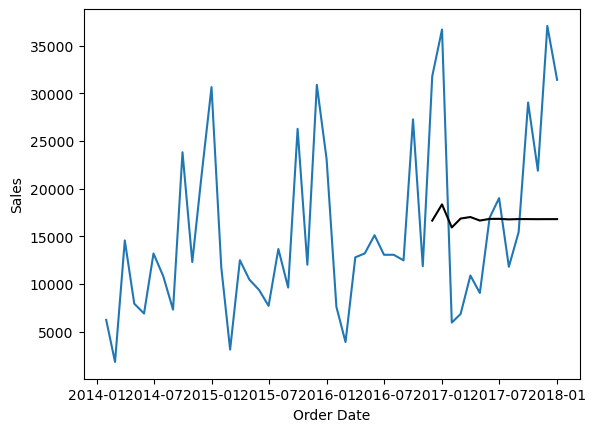

In [68]:
d1.dropna()
sns.lineplot(data = d1,x = d1.index , y = 'Sales')
sns.lineplot(data =d1,x = d1.index , y = 'Prediction',color = 'Black')
plt.show()


In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [70]:
model = SARIMAX(train['Sales'],order=(0,0,2),seasonal_order=(2,1,0,12))
model = model.fit()

C:\Users\Prerak\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [71]:
d1['Sprediction'] = model.predict(start=test.index[0], end=test.index[-1])

In [72]:
import seaborn as sns

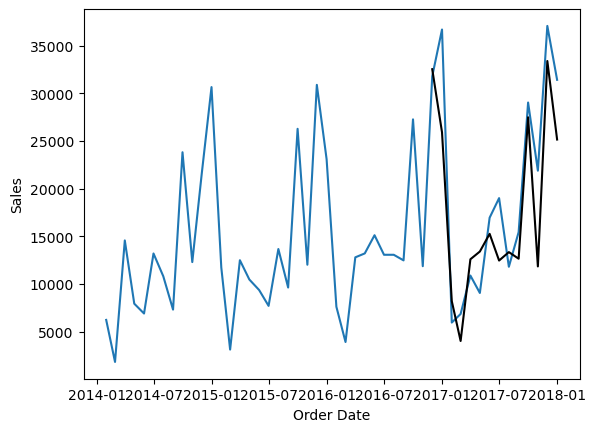

In [73]:
d1.dropna()
sns.lineplot(data = d1,x = d1.index , y = 'Sales')
sns.lineplot(data =d1,x = d1.index , y = 'Sprediction',color = 'Black')
plt.show()


In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [75]:

d = d1.dropna()
mae = mean_absolute_error(d['Sales'],d['Sprediction'])
mse = mean_squared_error(d['Sales'],d['Sprediction'])
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 4050.451551094032
Mean Squared Error (MSE): 25924307.99807894
Root Mean Squared Error (RMSE): 5091.591892333766


In [76]:
model = SARIMAX(d1['Sales'],order=(0,0,2),seasonal_order=(2,1,0,12))
model = model.fit()


In [77]:
forecast = model.forecast(12)

<Axes: >

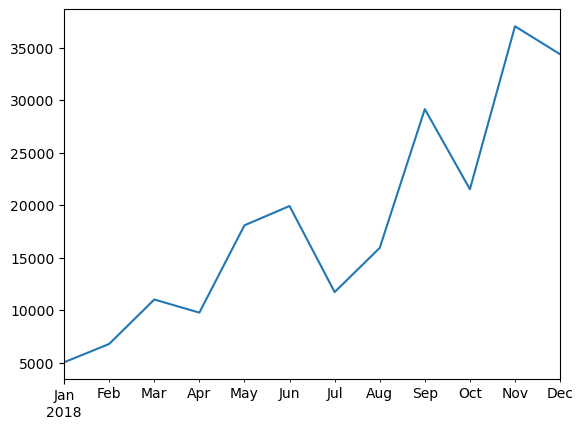

In [78]:
forecast.plot()

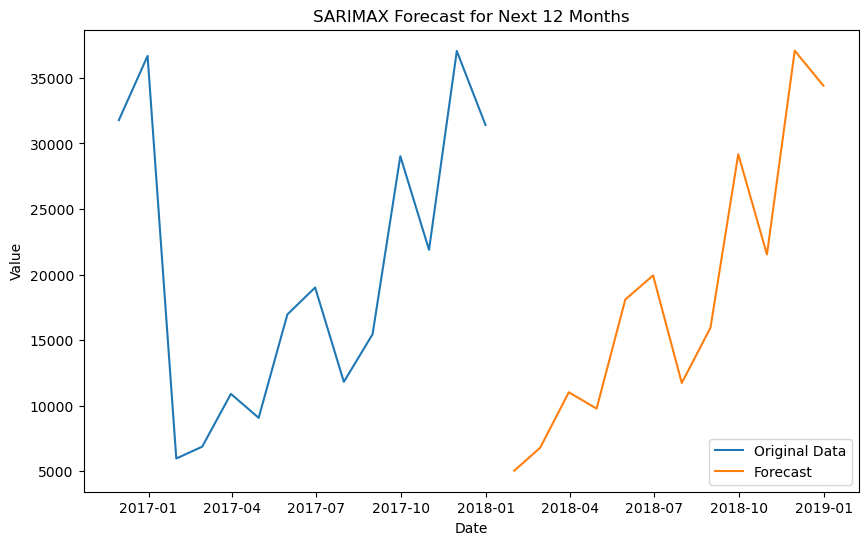

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Sales'], label='Original Data')
plt.plot(pd.date_range(start=test.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Forecast for Next 12 Months')
plt.legend()
plt.show()

Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [81]:
df.head()

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [82]:
r = df[['Order Date','Sales']]

In [83]:
r

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2015-10-11,957.5775
3,2014-06-09,48.8600
4,2014-06-09,1706.1840
...,...,...
2116,2015-03-19,383.4656
2117,2016-12-05,13.4000
2118,2015-09-06,85.9800
2119,2014-01-21,25.2480


In [94]:
r['Order Date'] = pd.to_datetime(r['Order Date'])

In [95]:
r  = r.groupby(pd.Grouper(key = 'Order Date',freq='M')).sum().reset_index()

In [96]:
r

,Order Date,Sales
0,2014-01-31,6242.5250
1,2014-02-28,1839.6580
2,2014-03-31,14573.9560
3,2014-04-30,7944.8370
4,2014-05-31,6912.7870
5,2014-06-30,13206.1256
6,2014-07-31,10821.0510
7,2014-08-31,7320.3465
8,2014-09-30,23816.4808
9,2014-10-31,12304.2470


In [97]:
x = r[['Order Date']]
y =r[['Sales']]

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [99]:
X1 = r[['Order Date']][:round(len(d1)*70/100)]
y1 = r[['Sales']][:round(len(d1)*70/100)]

In [100]:
re = RandomForestRegressor()

In [101]:
model = re.fit(x_train,y_train)
prediction = model.predict(x_test)

C:\Users\Prerak\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [102]:

prediction

array([17773.251403, 10188.777935, 11954.267717,  6024.154138,
       18716.001538, 21734.602702, 12226.397337, 14271.259921,
       26076.446685,  8707.163524, 31714.518189, 25336.116917,
       26382.03304 , 20213.506559,  7129.268679])

In [103]:
mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 7270.748800266667
Mean Squared Error (MSE): 115382874.65731467
Root Mean Squared Error (RMSE): 10741.642083839633
